# Analisis de tiempos del algoritmo

In [79]:
from algoritmo import obtener_ganancia_maxima
import random
from time import time
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

def correr_benchmark(cantidad, max):
    esfuerzos, energias = generar_esfuerzos_y_energias_random(cantidad, max)
    
    empieza = time()
    obtener_ganancia_maxima(esfuerzos, energias)
    termina = time()
    
    return termina - empieza
        
def generar_esfuerzos_y_energias_random(cantidad, max):
    esfuerzos = [random.randint(1, max) for _ in range(cantidad)]
    energias = sorted([random.randint(1, max) for _ in range(cantidad)], reverse=True)
    
    return esfuerzos, energias

### Variando el largo de las listas de esfuerzos y energias (n)

* En estas pruebas se vera como afecta la cantidad de entrenamientos al tiempo del algoritmo.
* Los Ei y Sj seran random entre 1 a 50000 (los Sj estan ordenados de mayor a menor)

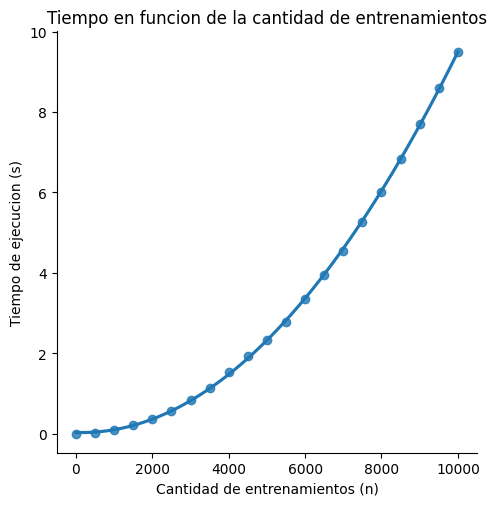

In [80]:
def plottear_tiempos_en_funcion_de_cantidad_de_entrenamientos():

    cantidades = [ i for i in range(0, 10001, 500) ]
    cantidades[0] = 2
    max_valores = 50000

    tiempos = []
    for index, cantidad in enumerate(cantidades):
        tiempos.append(correr_benchmark(cantidad, max_valores))

    df = pd.DataFrame(data={"cantidades": cantidades, "tiempos": tiempos})
    sns.lmplot(x='cantidades', y='tiempos', data=df, order=2)
    plt.title("Tiempo en funcion de la cantidad de entrenamientos")
    plt.xlabel("Cantidad de entrenamientos (n)")
    plt.ylabel("Tiempo de ejecucion (s)")
    
plottear_tiempos_en_funcion_de_cantidad_de_entrenamientos()

Se puede observar que a medida que aumenta *n*, el grafico se parece a una parabola y esto confirma la complejidad temporal teorica del algoritmo *O(n^2)*.

### Variando Ei y Sj (esfuerzos y energias)

* En estas pruebas se vera como afecta al tiempo del algoritmo cuando Ei y Sj son numeros mas chicos o son numeros mas grandes.
* La cantidad de entrenamientos se fijara en 1000.

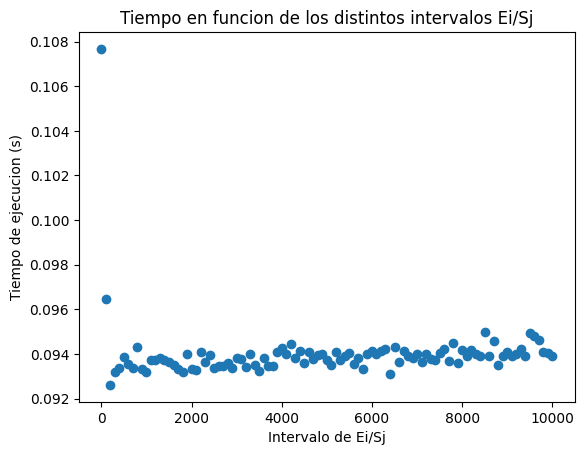

In [76]:
def plotear_tiempos_duracion_variante_final():

    cantidades = 1000
    max_valores = [ i for i in range(0, 10001, 100) ]
    max_valores[0] = 2

    tiempos = []
    for index, max_valor in enumerate(max_valores):
        tiempos.append(correr_benchmark(cantidades, max_valor))
    plt.figure()
    plt.scatter(x=max_valores, y=tiempos)
    plt.title("Tiempo en funcion de los distintos intervalos Ei/Sj")
    plt.xlabel("Intervalo de Ei/Sj")
    plt.ylabel("Tiempo de ejecucion (s)")

plotear_tiempos_duracion_variante_final()

En este grafico se puede observar que el tiempo que tarda el algoritmo no se ve afectado por la variabilidad de los numeros Ei y Sj.

### Ejemplos de ejecucion

In [83]:
# n = 3
esfuerzos = [1, 5, 4]
energias = [10, 2, 2]
ejecucion = obtener_ganancia_maxima(esfuerzos, energias)
print(f"Ganancia maxima: {ejecucion[0]}\nEntrenamientos: {ejecucion[1]}\n")

# n = 10
esfuerzos = [75, 77, 54, 36, 78, 36, 44, 77, 48, 65]
energias = [74, 69, 65, 65, 64, 37, 23, 22, 22, 7]
ejecucion = obtener_ganancia_maxima(esfuerzos, energias)
print(f"Ganancia maxima: {ejecucion[0]}\nEntrenamientos: {ejecucion[1]}\n")

# Contraejemplo del primer algoritmo considerado
# esfuerzos = []
# energias = []
# ejecucion = obtener_ganancia_maxima(esfuerzos, energias)
# print(f"Ganancia maxima: {ejecucion[0]}\nEntrenamientos: {ejecucion[1]}")

Ganancia maxima: 7
Entrenamientos: ['Descanso', 'Entreno', 'Entreno']

Ganancia maxima: 523
Entrenamientos: ['Entreno', 'Entreno', 'Entreno', 'Entreno', 'Entreno', 'Descanso', 'Entreno', 'Entreno', 'Entreno', 'Entreno']

